# Preprocessing Daily Rainfall Data in DAM Upstream 

### 0. Download Data from HydroShare

In [1]:
from hsclient import HydroShare
import os, shutil

hs = HydroShare()
hs.sign_in()

In [23]:
# Get the resource you want to download using its identifier
res_identifier = '7b8279698ffa4a1391aed57c7b9924a9'
res = hs.resource(res_identifier)

# Download the resource as a zipped Bagit file
# Pass in a file path if you want to download to a particular location
res.download()

'7b8279698ffa4a1391aed57c7b9924a9.zip'

In [26]:
cwd_path = os.getcwd()
hs_path = os.path.join(cwd_path, res_identifier + ".zip")
shutil.unpack_archive(hs_path, extract_dir=cwd_path)
file_folder = os.path.join(cwd_path, res_identifier, "data/contents")
folder_name = os.listdir(file_folder)[0].split(".")[0]
raw_data = os.path.join(cwd_path, folder_name, "raw_data")
if not os.path.exists(raw_data):
    os.mkdir(os.path.join(cwd_path, folder_name))
    os.mkdir(raw_data)                  
shutil.unpack_archive(os.path.join(file_folder, os.listdir(file_folder)[0]), extract_dir=raw_data)
os.remove(hs_path)
shutil.rmtree(os.path.join(cwd_path, res_identifier))

### 1. Import Required Python Libraries

In [27]:
import pandas as pd
import datetime
from datetime import timedelta
from pylab import rcParams
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
warnings.filterwarnings("ignore")

### 2. Read daily Rainfall data in Dam Downstream

<div class="alert alert-success">
Read Daily Rainfall Data that obtained from DAON database system in K-water </div>

In [29]:
obs_folder_name = "YD_DAM_Upstream"
raw_data_folder = os.path.join(os.getcwd(), obs_folder_name, "raw_data")
os.listdir(raw_data_folder)

['YD_DAM_Upstream_WaterLevel_Daily.csv',
 '1_YD_DAM_Upstream_Rainfall_Observation_Periods.csv',
 'YD_DAM_Operation_Data_Daily.csv',
 '2_YD_DAM_Upstream_WaterLevel_Observation.xlsx',
 'YD_DAM_Upstream_WaterLevel_Hourly.csv',
 'YD_DAM_Upstream_Rainfall_Daily.csv',
 'YD_DAM_Operation_Data_Hourly.csv',
 'YD_DAM_Upstream_Rainfall_Hourly.csv']

In [33]:
all_obs_df = pd.read_csv(os.path.join(raw_data_folder, "YD_DAM_Upstream_Rainfall_Daily.csv"))
all_obs_df.head()

,OBSYMD,RFOBSCD,RF
0,19970317,3003430,0.0
1,19970318,3003430,0.0
2,19970319,3003430,0.0
3,19970320,3003430,0.0
4,19970316,3003430,1.0


<div class="alert alert-success">
Total Rainfall stations in Dam Upstream </div>

In [34]:
all_obs_code = all_obs_df["RFOBSCD"].unique()
all_obs_code

array([3003430, 9000029, 8000703, 3001415, 9000023, 9000025, 9000026,
       3001442, 3001440, 9000193, 2020410, 8000757, 9000027, 8000758,
       3001410, 9000030, 9000028, 8000314, 8000248, 8005911, 8005906,
       8005913, 8005715, 8005907, 8005902, 8005228, 8005229, 8004900,
       8004901, 8005223, 8005224, 8005220, 8005254, 8005929, 8005705,
       8004174])

### 3. Set Rainfall stations considering data observation periods

<div class="alert alert-success">
In Dam Upstream Rainfall stations, we selected the stations with an more than 24 years observation periods. </div>

In [36]:
obs_periods_df = pd.read_csv(os.path.join(raw_data_folder, "1_YD_DAM_Upstream_Rainfall_Observation_Periods.csv"))
obs_periods_df.head()

,RFOBSCD,MAX(OBSDH),MIN(OBSDH),START_YEAR,START_YEAR.1,OBS_PERIODS
0,2020410,2024011619,2004022123,2024,2004,20
1,3001410,2024011619,2004022123,2024,2004,20
2,3001415,2024011619,2004010101,2024,2004,20
3,3001440,2024011619,2004022123,2024,2004,20
4,3001442,2024011619,2008030420,2024,2008,16


In [9]:
code_select = obs_periods_df[obs_periods_df['OBS_PERIODS'] >= 24]
code_select

,RFOBSCD,MAX(OBSDH),MIN(OBSDH),START_YEAR,START_YEAR.1,OBS_PERIODS
5,3003430,2024011619,1979070101,2024,1979,45
28,9000023,2024011619,2000053001,2024,2000,24
29,9000025,2024011619,2000053001,2024,2000,24
30,9000026,2024011619,2000053001,2024,2000,24
31,9000027,2024011619,2000053001,2024,2000,24
32,9000028,2024011619,2000053001,2024,2000,24
33,9000029,2024011619,2000053001,2024,2000,24
34,9000030,2024011619,1997031301,2024,1997,27


In [10]:
obs_code = code_select.RFOBSCD.values
obs_code

array([3003430, 9000023, 9000025, 9000026, 9000027, 9000028, 9000029,
       9000030])

### 4. Set Date Data Format and Observation Periods 

<div class="alert alert-success">
Change "date data format" from string to Pandas datetime format </div>

In [37]:
all_obs_df["date"] = pd.to_datetime(all_obs_df["OBSYMD"], format='%Y%m%d')
all_obs_df.head()

,OBSYMD,RFOBSCD,RF,date
0,19970317,3003430,0.0,1997-03-17
1,19970318,3003430,0.0,1997-03-18
2,19970319,3003430,0.0,1997-03-19
3,19970320,3003430,0.0,1997-03-20
4,19970316,3003430,1.0,1997-03-16
...,...,...,...,...
158100,20240107,9000030,0.0,2024-01-07
158101,20240112,8005220,0.0,2024-01-12
158102,20240112,8004900,0.0,2024-01-12
158103,20240107,8005224,1.0,2024-01-07


<div class="alert alert-success">
Check Observation Periods to create Date Dataframe </div>

In [38]:
all_obs_df["date"].min(), all_obs_df["date"].max()

(Timestamp('1979-07-15 00:00:00'), Timestamp('2024-01-16 00:00:00'))

<div class="alert alert-success">
Create Total Date Periods using Max and Min date above </div>

In [39]:
total_date_df = pd.DataFrame(
    {'date': pd.date_range(start=all_obs_df["date"].min(), end=all_obs_df["date"].max(), freq='1D'),
    }
)
print(len(total_date_df))
total_rf_df = total_date_df
total_date_df.head()

16257


,date
0,1979-07-15
1,1979-07-16
2,1979-07-17
3,1979-07-18
4,1979-07-19


### 5. Preprocessing Daily Data in Dam Upstream

<div class="alert alert-success">
<b> Create Daily Dataframe using station codes as columns </div>

In [40]:
for code in obs_code:
    code_data = all_obs_df[all_obs_df['RFOBSCD'] == code]
    total_df = pd.merge(total_rf_df, code_data, on="date", how="left")
    total_rf_df[str(code)+"_drf"] = total_df["RF"].values
    
total_rf_df_f = total_rf_df.set_index("date")
total_rf_df_f.head()

,3003430_drf,9000023_drf,9000025_drf,9000026_drf,9000027_drf,9000028_drf,9000029_drf,9000030_drf
date,,,,,,,,
1979-07-15,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-07-16,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-07-17,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-07-18,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-07-19,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-success">
<b> Select important stations </div>

In [41]:
selected_rf_df_f = total_rf_df_f.loc["2000-10-01":"2023-09-30"]
selected_rf_df_f.head()

,3003430_drf,9000023_drf,9000025_drf,9000026_drf,9000027_drf,9000028_drf,9000029_drf,9000030_drf
date,,,,,,,,
2000-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-10-02,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-10-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-10-04,0.0,11.0,10.0,10.0,9.0,12.0,9.0,16.0
2000-10-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div class="alert alert-success">
Check Missing Data in stations : Sum of number of missing data is printed below. </div>

In [42]:
print(len(selected_rf_df_f[selected_rf_df_f.isna().any(axis=1)]))

25


<div class="alert alert-success">
Plotting Missing data </div>

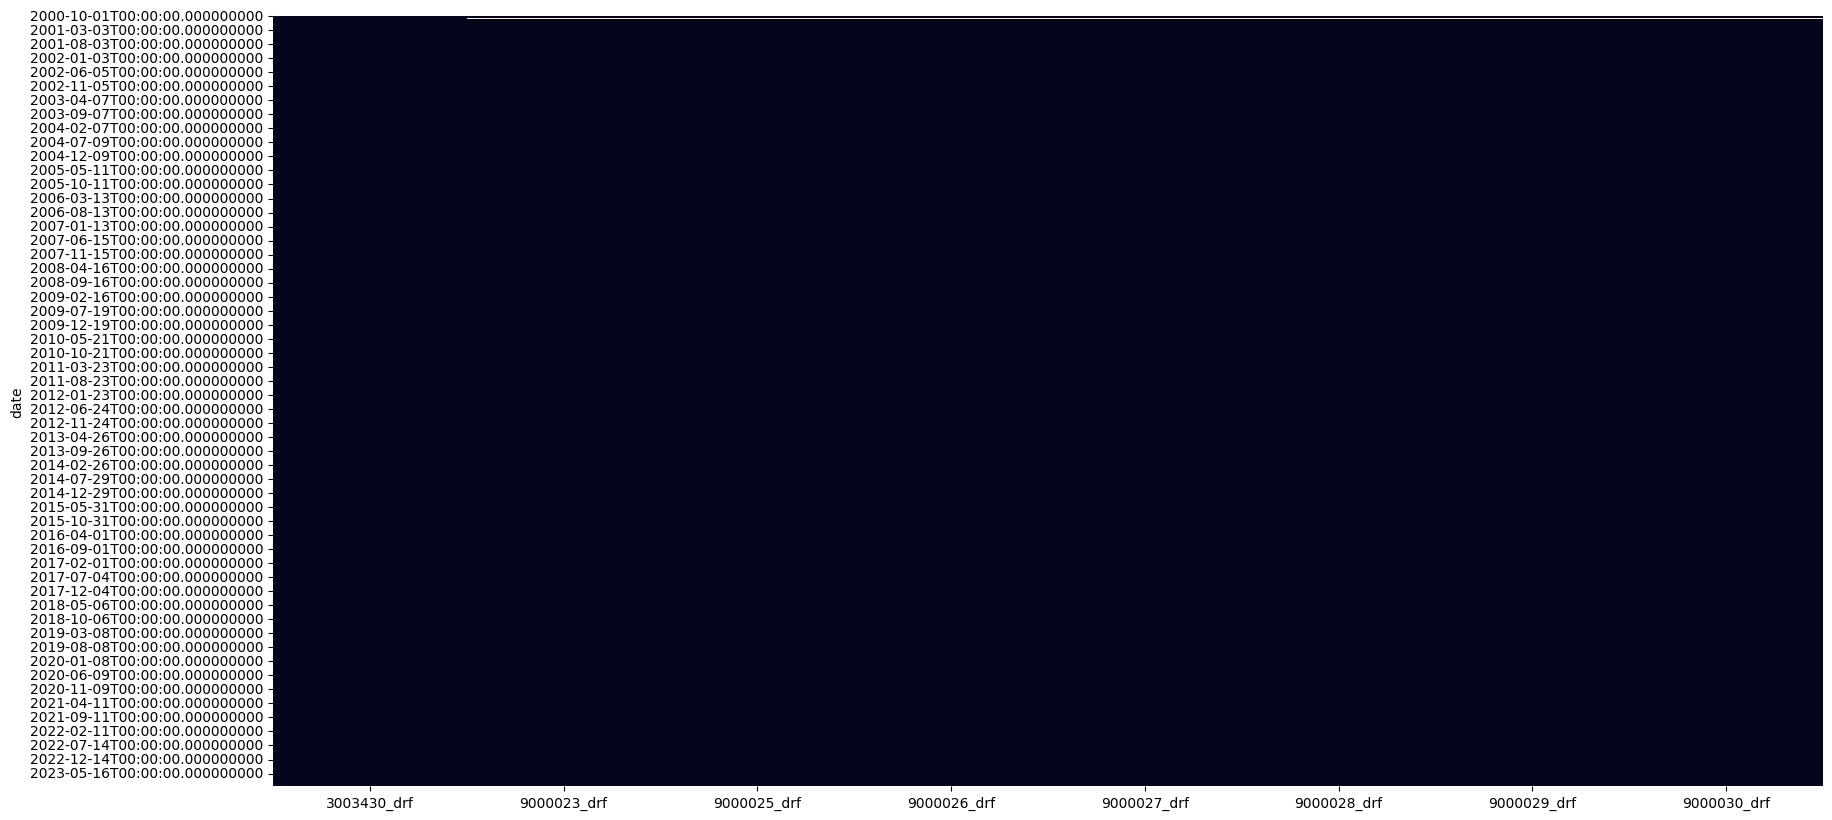

In [43]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(selected_rf_df_f.isnull(), cbar=False)
plt.savefig(os.getcwd() + "/" + obs_folder_name + "/rf_dam_upstream_missing_daily.png", bbox_inches='tight')
plt.show()

<div class="alert alert-success">
Plotting Water Level Plot in selected stations </div>

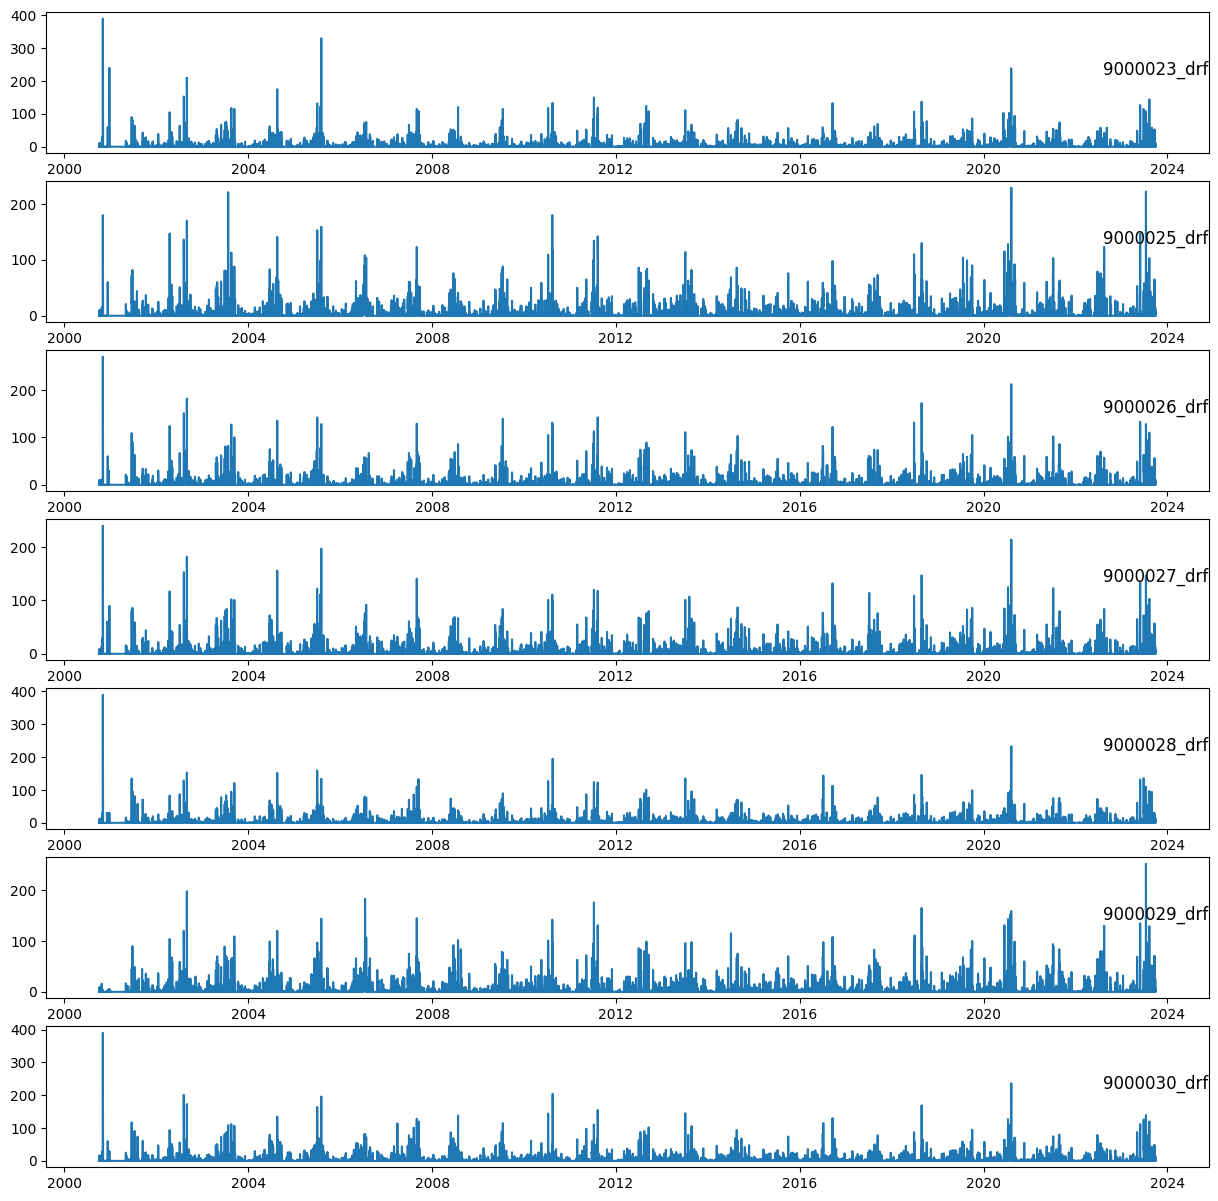

In [44]:
rcParams['figure.figsize'] = 15, 15
values = selected_rf_df_f.values
groups = [*range(1,len(selected_rf_df_f.columns), 1)]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(selected_rf_df_f.index,  values[:, group])
    plt.title(selected_rf_df_f.columns[group], y=0.5, loc='right')
    i += 1

plt.savefig(os.getcwd() + "/" + obs_folder_name + "/rf_dam_upstream_ts_daily.png", bbox_inches='tight')
plt.show()

<div class="alert alert-success">
Interpolating missing data using Pandas library </div>

In [45]:
selected_rf_df_f_revised = selected_rf_df_f
col_name = list(selected_rf_df_f_revised)
selected_rf_df_f_revised[col_name] = selected_rf_df_f_revised[col_name].interpolate(method="pad")
selected_rf_df_f_revised[selected_rf_df_f_revised.isna().any(axis=1)]

,3003430_drf,9000023_drf,9000025_drf,9000026_drf,9000027_drf,9000028_drf,9000029_drf,9000030_drf
date,,,,,,,,


<div class="alert alert-success">
Check missing data </div>

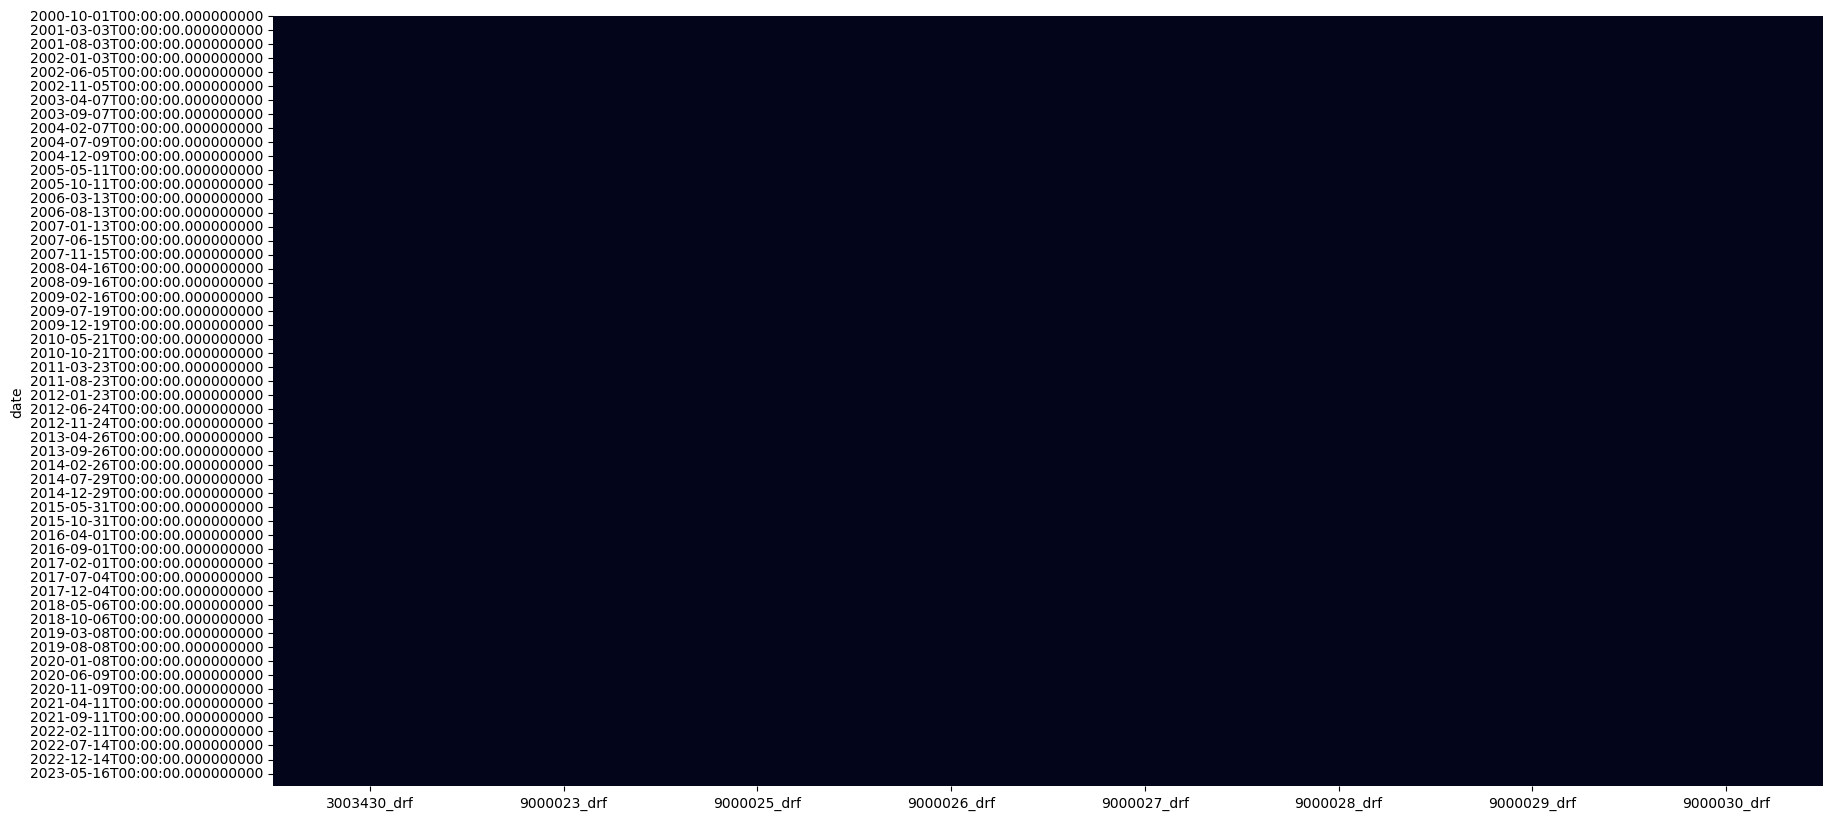

In [46]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(selected_rf_df_f_revised.isnull(), cbar=False)
plt.savefig(os.getcwd() + "/" + obs_folder_name + "/rf_upstream_missing_daily_revised.png", bbox_inches='tight')
plt.show()

<div class="alert alert-success">
Plotting Rainfall (that has no missing data) in selected stations </div>

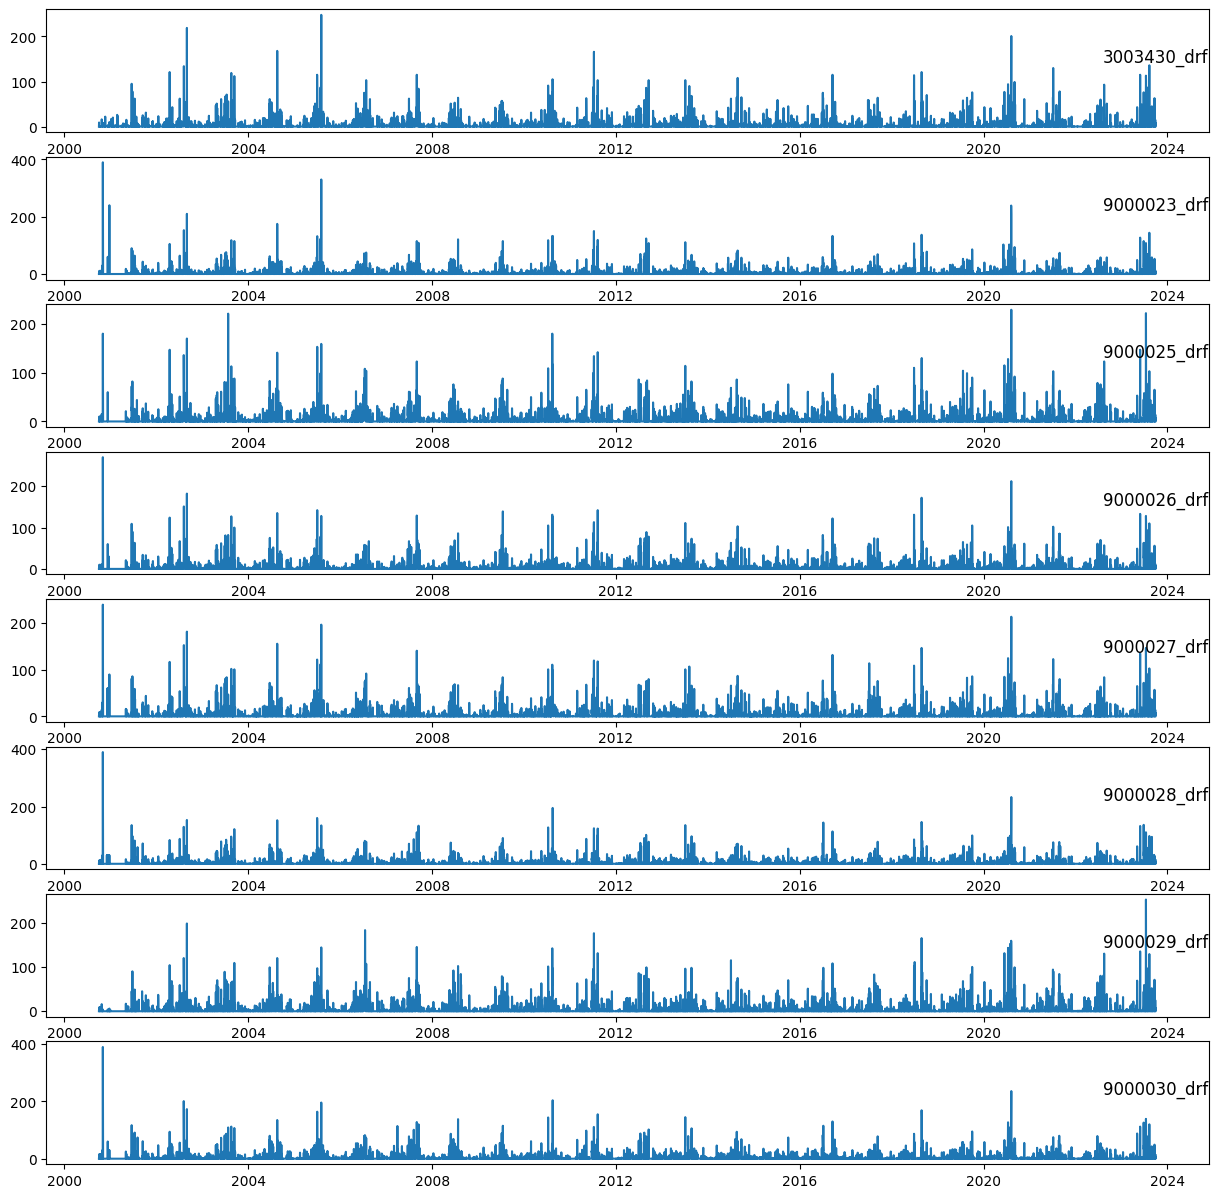

In [47]:
rcParams['figure.figsize'] = 15, 15
values = selected_rf_df_f_revised.values
groups = [*range(0,len(selected_rf_df_f_revised.columns), 1)]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(selected_rf_df_f_revised.index,  values[:, group])
    plt.title(selected_rf_df_f_revised.columns[group], y=0.5, loc='right')
    i += 1

plt.savefig(os.getcwd() + "/" + obs_folder_name + "/rf_dam_upstream_ts_daily_revised.png", bbox_inches='tight')
plt.show()

### 6. Save Daily Rainfall Data as CSV format

In [48]:
selected_rf_df_f_revised.to_csv(os.getcwd() + "/" + obs_folder_name + "/YD_Dam_Upstream_Rainfall_Daily_f.csv")

### 7. Creating Model Input using observation data